1. sklearn中LogisticRegression$L_1$正则化   
$$ J(\beta) + \alpha L_1 \Longrightarrow CJ(\beta) + L_1$$    
2. sklearn中LogisticRegression$L_2$正则化    
$$ J(\beta) + \alpha L_2 \Longrightarrow CJ(\beta) + L_2 $$    

易知:$C$为$\alpha$的倒数,较小的值指定更强的正则化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:, 0]**2+X[:, 1])<1.5, dtype=np.int32)
for _ in range(20):
    y[np.random.randint(200)] = 1 # 添加一定噪音

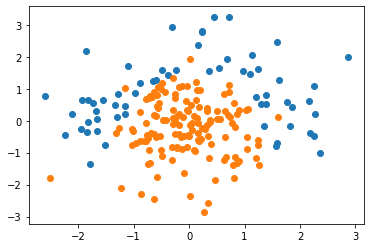

In [2]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

log_reg = LogisticRegression(solver='lbfgs', n_jobs=-1) 
# default:c=1.0
# default:penalty='l2'
# default:solve='lbfgs'(支持L2正则化,不支持L1正则化,支持OvR,MvM).拟牛顿法的一种
#         solve='sag'(支持L2正则化,不支持L1正则化,支持OvR,MvM).随机平均梯度下降法,适用于样本量非常大的数据集
#         solve='saga'(支持L2正则化,不支持L1正则化,还支持elasticnet/弹性网正则化.支持OvR,MvM).An accelerated SAGA variant,线性收敛的随机优化算法的的变种,适用于样本量非常大的数据集
#         solve='liblinear'(支持L2正则化,不支持L1正则化,支持OvR,不支持MvM).开源的liblinear库实现,内部使用了坐标轴下降法来迭代优化损失函数,适用于小数据集
log_reg.fit(X_train, y_train) # 使用直线进行拟合

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
log_reg.score(X_train, y_train)

0.7533333333333333

In [5]:
log_reg.predict_proba(X_train) # 预测结果天生就可以输出为概率向量

array([[0.1180646 , 0.8819354 ],
       [0.21643805, 0.78356195],
       [0.20429836, 0.79570164],
       [0.36363632, 0.63636368],
       [0.27125523, 0.72874477],
       [0.87215582, 0.12784418],
       [0.31172888, 0.68827112],
       [0.51132892, 0.48867108],
       [0.55560138, 0.44439862],
       [0.18311509, 0.81688491],
       [0.1224361 , 0.8775639 ],
       [0.43478291, 0.56521709],
       [0.66015037, 0.33984963],
       [0.59428599, 0.40571401],
       [0.49904371, 0.50095629],
       [0.20028595, 0.79971405],
       [0.24240537, 0.75759463],
       [0.11691302, 0.88308698],
       [0.14996367, 0.85003633],
       [0.16405981, 0.83594019],
       [0.43395806, 0.56604194],
       [0.06246353, 0.93753647],
       [0.46709835, 0.53290165],
       [0.14890629, 0.85109371],
       [0.31332888, 0.68667112],
       [0.32690064, 0.67309936],
       [0.13285835, 0.86714165],
       [0.29391641, 0.70608359],
       [0.12703477, 0.87296523],
       [0.52392957, 0.47607043],
       [0.

In [6]:
log_reg.predict(X_train) # Predict class labels for samples in X.

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
log_reg.score(X_test, y_test) # 欠拟合

0.76

In [8]:
def plot_decision_boundary(model, 
                           axis): # 坐标轴范围
    """绘制决策边界""" 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'red'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


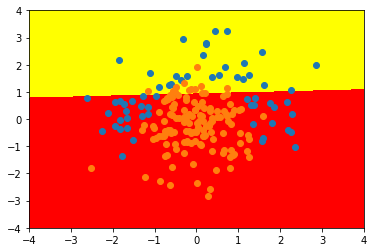

In [9]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [10]:
def PolynomialLogisticRegression(degree):
    # 管道机制实现了对全部步骤的流式化封装和管理
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(n_jobs=-1, solver='lbfgs'))
    ])

In [11]:
poly_log_reg = PolynomialLogisticRegression(degree=2) # 多项式最高项次数为2
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [12]:
poly_log_reg.score(X_train, y_train)

0.9466666666666667

In [13]:
poly_log_reg.score(X_test, y_test) # 拟合程度较好

0.94

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


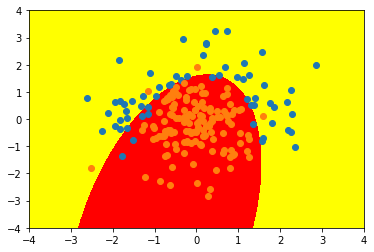

In [14]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [15]:
poly_log_reg[2].coef_ # 解释变量(项)的系数

array([[ 0.        , -0.12439165, -2.14160993, -2.66360062,  0.67185857,
        -0.59729977]])

In [16]:
poly_log_reg[2].intercept_ # 截距项

array([1.37913695])

In [17]:
poly_log_reg[0].get_feature_names() # 多项式的各项

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [18]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20) # 多项式最高项次数为20
poly_log_reg2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [19]:
poly_log_reg2.score(X_train, y_train)

0.96

In [20]:
poly_log_reg2.score(X_test, y_test) # score没有得到提高

0.92

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


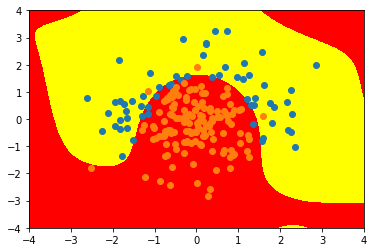

In [21]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 决策边界复杂,可能出现了过拟合

In [22]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, n_jobs=-1, solver='saga', max_iter=1000))
    ])

In [23]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l2')
poly_log_reg3.fit(X_train, y_train)

D:\CodeProgram\anconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='warn', n_jobs=-1, penalty='l2',
                                    random_state=None, solver='saga',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [24]:
poly_log_reg3.score(X_train, y_train)

0.8933333333333333

In [25]:
poly_log_reg3.score(X_test, y_test)

0.88

In [26]:
poly_log_reg3[2].coef_ # L2正则不能将多项式系数收缩为0

array([[ 0.00000000e+00,  7.96535518e-02, -5.40571405e-01,
        -9.46956277e-01,  5.39268049e-03, -2.26923115e-01,
         3.55450501e-02, -2.73471181e-01, -8.53807069e-02,
        -3.11068762e-01, -4.89897549e-01,  1.53888241e-02,
        -1.61204800e-01, -3.54148734e-02, -1.17738762e-01,
         1.04147313e-03, -8.54828343e-02, -6.76068324e-02,
        -1.75908970e-01, -6.63576005e-02, -1.62362961e-01,
        -2.24034483e-01,  1.99390574e-02, -4.00412264e-02,
         5.54523501e-03, -5.12039852e-02, -3.05189045e-02,
        -6.68538637e-02, -1.50431744e-02, -4.57458250e-02,
        -4.47337128e-02, -6.24597216e-02, -5.57733409e-02,
        -1.18055601e-01, -4.38662640e-02, -9.80742374e-02,
        -1.04428112e-01,  1.59770357e-02, -7.49123167e-03,
         1.22006094e-02,  5.78407239e-05,  3.66904496e-03,
        -3.01165152e-02, -2.49421582e-02, -4.59476414e-02,
        -2.02100986e-02, -3.42218250e-02, -3.37256674e-02,
        -3.83433075e-02, -3.82197745e-02, -5.13893728e-0

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


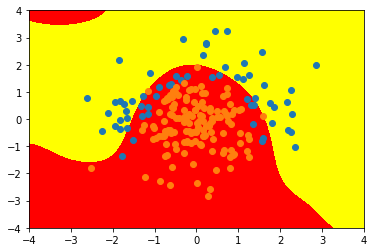

In [27]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [28]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train, y_train)

D:\CodeProgram\anconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='warn', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='saga',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [29]:
poly_log_reg4.score(X_train, y_train)

0.8733333333333333

In [30]:
poly_log_reg4.score(X_test, y_test)

0.88

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


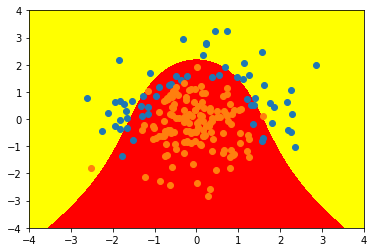

In [31]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [32]:
poly_log_reg4[2].coef_ # L1正则可以将某些多项式系数收缩为0,因此可以给出一个简单的可解释的模型

array([[ 0.        ,  0.        , -0.58605724, -0.90294741,  0.        ,
        -0.01783834,  0.        , -0.10273577,  0.        , -0.25488123,
        -0.05188952,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 